In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
include("HyperECNNs.jl")
rng = MersenneTwister(123);

In [2]:
if ~isdir("Figures")
    mkdir("Figures")
    print("Created a folder for the figures.")
end

In [3]:
MarkerList = ["o","s","v","^",">","<"];
LineStyleList = ["solid","dashed","solid","dashed","solid","dashed"];

Hypercomplex ECNN (Synchronous) failed to converge in 1000.0 iterations.
Hypercomplex ECNN (Asynchronous)

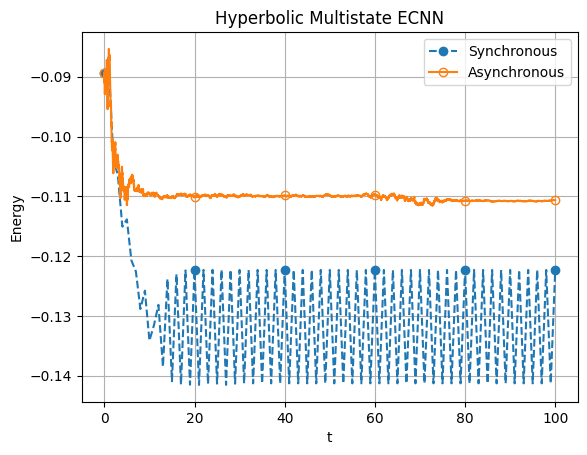

 failed to converge in 1000.0 iterations.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
N = 100
P = 160
K = 256
alpha = 10/N
beta = -10

Energy_Sync=0
Energy_Seq=0

PlotLimit = 100
MultiStates = exp.(2*pi*collect(0:K-1)*im/K)
U=zeros(N,2,P)
for i=1:1
    Uc = rand(rng,MultiStates,(N,P))
    U[:,1,:] = real.(Uc)
    U[:,2,:] = imag.(Uc)
    
    xc = rand(rng,MultiStates,(N,1))
    x = hcat(real.(xc),imag.(xc))

    y, Energy_Sync = HyperECNNs.Sync(HyperECNNs.LambdaInner,[1,-1],HyperECNNs.csign,K,U,x,alpha,beta)
    y, Energy_Seq = HyperECNNs.Seq(HyperECNNs.LambdaInner,[1,-1],HyperECNNs.csign,K,U,x,alpha,beta)
    
    plot(collect(0:PlotLimit),Energy_Sync[1:PlotLimit+1], linestyle = LineStyleList[2], marker = MarkerList[i], markevery=20, label = "Synchronous")
    plot(collect(0:N*PlotLimit)/N,Energy_Seq[1:N*PlotLimit+1], linestyle = LineStyleList[1], marker = MarkerList[i], markevery=2000,  mfc="none", label = "Asynchronous")
end
xlabel("t")
ylabel("Energy")
title("Hyperbolic Multistate ECNN")
legend()
grid()
savefig("Figures/EnergyHvMultistate.eps")
savefig("Figures/EnergyHvMultistate.pdf")